                             Motif du déplacement  Répartition
3           Déplacement professionnel occasionnel    21.036364
4    Loisirs, vacances, visite d'un proche ou ami    29.472727
2  Déplacement domicile - étude (y compris stage)    14.800000
0   Démarches administratives, médicales ou achat     3.163265
1         Déplacement domicile - travail habituel    31.472727


/Users/pruvost/ETUDE_SNCF_MOTIF_DEPLACEMENT.pdf

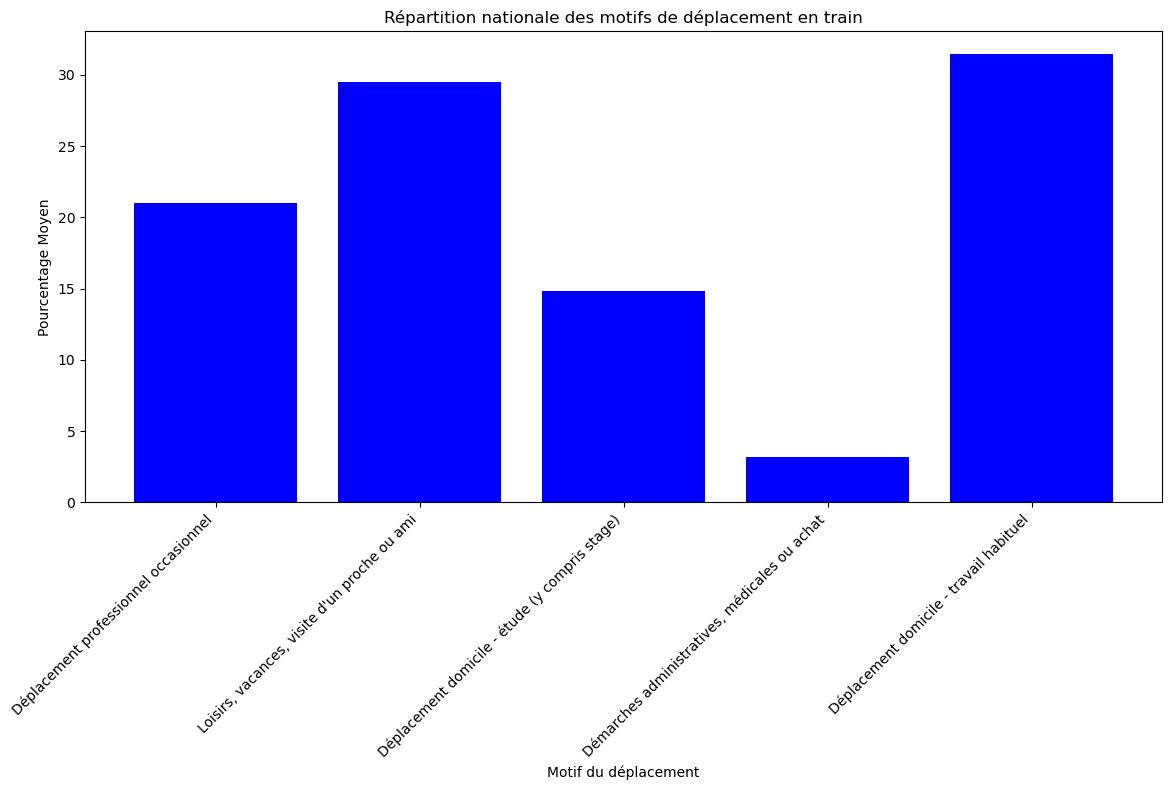

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'repartition-des-motifs-de-deplacements-des-voyageurs-et-non-voyageurs-enquetes-e.csv'
data = pd.read_csv(file_path, delimiter=';') 

data.columns = ['UIC', 'Gare enquêtée', 'Motif du déplacement', 'Répartition', 'Année']


data['Répartition'] = pd.to_numeric(data['Répartition'], errors='coerce')
data['Année'] = pd.to_numeric(data['Année'], errors='coerce')


mean_percentage_by_motif = data.groupby('Motif du déplacement')['Répartition'].mean().reset_index()


motif_order = ["Déplacement professionnel occasionnel", "Loisirs, vacances, visite d'un proche ou ami", 'Déplacement domicile - étude (y compris stage)', 'Démarches administratives, médicales ou achat', 'Déplacement domicile - travail habituel', '']
mean_percentage_by_motif['Motif du déplacement'] = pd.Categorical(mean_percentage_by_motif['Motif du déplacement'], categories=motif_order, ordered=True)


mean_percentage_by_motif = mean_percentage_by_motif.sort_values('Motif du déplacement')


print(mean_percentage_by_motif)


plt.figure(figsize=(12, 8)) 
plt.bar(mean_percentage_by_motif['Motif du déplacement'], mean_percentage_by_motif['Répartition'], color='blue')
plt.xlabel('Motif du déplacement') 
plt.ylabel('Pourcentage Moyen')  
plt.title('Répartition nationale des motifs de déplacement en train')  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 


plt.savefig('ETUDE_SNCF_MOTIF_DEPLACEMENT.pdf')
from IPython.display import FileLink

display(FileLink('ETUDE_SNCF_MOTIF_DEPLACEMENT.pdf'))
plt.show()  
